In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_seluler.csv")

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_class
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0


In [5]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_class      0
dtype: int64

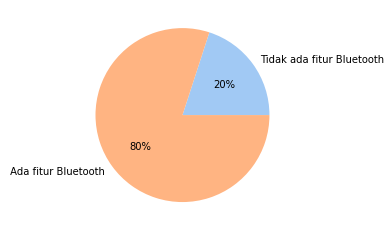

In [6]:
#Persentase telepon seluler yang mempunyai fitur Bluetooth
data = [1, 4]
labels = ['Tidak ada fitur Bluetooth', ' Ada fitur Bluetooth']
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

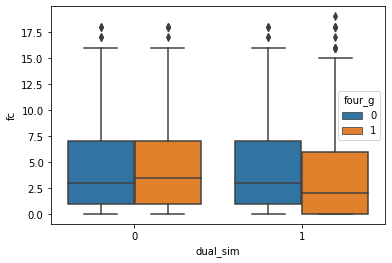

In [7]:
#Data imbalanced
sns.boxplot(x="dual_sim", y="fc", hue="four_g", data= df);

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [95]:
df_x = df.iloc[:, :-1]
df_x.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_class
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0


In [96]:
x_array =  np.array(df_x)
print(x_array)

[[8.420e+02 0.000e+00 2.200e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [1.021e+03 1.000e+00 5.000e-01 ... 1.000e+00 0.000e+00 1.000e+00]
 [5.630e+02 1.000e+00 5.000e-01 ... 1.000e+00 0.000e+00 1.000e+00]
 ...
 [1.911e+03 0.000e+00 9.000e-01 ... 1.000e+00 0.000e+00 1.000e+00]
 [1.512e+03 0.000e+00 9.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 [5.100e+02 1.000e+00 2.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]]


In [107]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 1.        ,
        0.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 0.        ,
        1.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [108]:
kmeans = KMeans(n_clusters = 21, random_state=123)
kmeans.fit(x_scaled)

KMeans(n_clusters=21, random_state=123)

In [109]:
df["kluster"] = kmeans.labels_

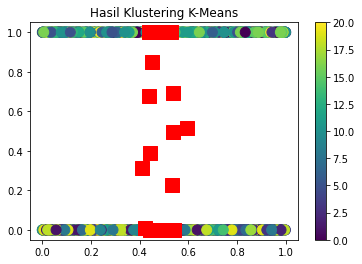

In [110]:
#clustering dengan K-means
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = df.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="s");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

In [ ]:
df_y = df.iloc[:, 11:14]
df_y.head()

,px_height,px_width,ram
0,20,756,2549
1,905,1988,2631
2,1263,1716,2603
3,1216,1786,2769
4,1208,1212,1411


In [116]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
fit_pca = pca.fit_transform(df_x)

In [ ]:
#Reduksi Variabel
pca_df = pd.DataFrame(data = fit_pca, columns = ['PCA_1', 'PCA_2'])
pca_df.tail()

,PCA_1,PCA_2
1995,0.722124,0.423528
1996,-0.042480,-0.731559
1997,0.003833,0.192037
1998,0.675811,-0.500069
1999,-0.042480,-0.731559


In [42]:
X = df.iloc[:, :-1]
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_class
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0


In [85]:
y = df.iloc[:,19:20]
y.head()

,wifi
0,1
1,0
2,0
3,0
4,0


In [86]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [87]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [88]:
predictions=model.predict(x_test)

In [89]:
#Model Klasifikasi Linear Regresi 20 fitur
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.73      0.71       184
           1       0.75      0.71      0.73       216

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400

0.72


In [90]:
X2 = df.iloc[:, :10]
X2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores
0,842,0,2.2,0,1,0,7,0.6,188,2
1,1021,1,0.5,1,0,1,53,0.7,136,3
2,563,1,0.5,1,2,1,41,0.9,145,5
3,615,1,2.5,0,0,0,10,0.8,131,6
4,1821,1,1.2,0,13,1,44,0.6,141,2


In [91]:
y2 = df.iloc[:, 1:2]
y2.head()

,blue
0,0
1,1
2,1
3,1
4,1


In [92]:
X_train,x_test,y_train,y_test=train_test_split(X2,y2,test_size=0.2,random_state=42)

In [93]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model2.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [94]:
predictions=model2.predict(x_test)

In [84]:
#Model Klasifikasi Linear Regresi Seleksi fitur
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00       205

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

1.0
